In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

def plot_clusters(X, centroids, membership, iteration = 0):
    print(centroids)
    plt.subplot(111)
    plt.scatter(X[:, 0], X[:, 1], c=membership, cmap='jet', marker='.')
    for centroid in centroids:
        plt.plot([centroid[0]], [centroid[1]], marker='o', markersize=5, color="red")
    plt.title("Blobs ("+str(iteration)+")")
    plt.show()
    
def distance(p1, p2):
    return math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )

In [2]:
###generate blobs
n_samples = 1500
random_state = 42
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)


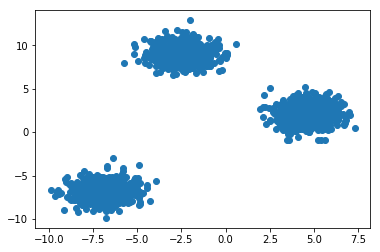

In [3]:
###see them
plt.subplot(111)
plt.scatter(X[:,0],X[:,1])
plt.show()

[[0, 0], [-5, -5], [2, 5]]
[[0, 0], [-5, -5], [2, 5]]


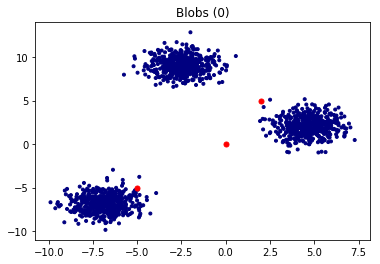

In [4]:
#init centroids and plot base clusters
centroids = [[0,0],[-5,-5],[2,5]]
print(centroids)
membership = np.ones(len(X))

plot_clusters(X, centroids, membership)

[[4.155370164946399, 0.6169967994916454], [-6.886664209466149, -6.858349424915809], [0.7915076642313372, 6.037132447481492]]


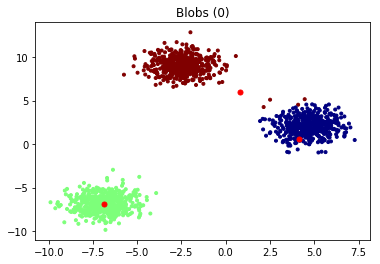

In [12]:
#k-means

for point_idx in range(len(X)):
    point = X[point_idx]
    min_distance = 99999
    for centroid_idx in range(len(centroids)):
        centroid = centroids[centroid_idx]
        if (distance(point, centroid) < min_distance):
            min_distance = distance(point, centroid)
            membership[point_idx] = centroid_idx
            
plot_clusters(X, centroids, membership, 0)

[[4.702851700600229, 2.0283316310828563], [-6.886664209466149, -6.858349424915809], [-2.4570618138928992, 9.014420139177199]]


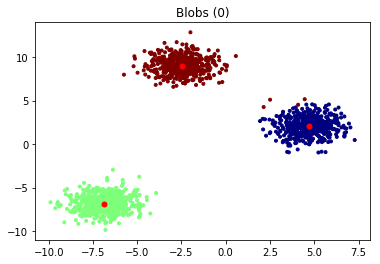

In [13]:

for centroid_idx in range(len(centroids)):
    old_centroid = centroids[centroid_idx]
    centroids[centroid_idx] = [np.mean(X[membership == centroid_idx, 0]),
                               np.mean(X[membership == centroid_idx, 1])]
                                       
plot_clusters(X, centroids, membership, 0)

[[1, 1], [3, 6], [-2, 6]]


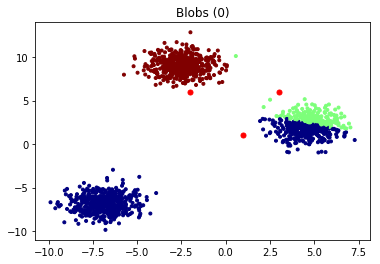

[[-2.4928982702805484, -3.6391855013325816], [5.02557101927562, 3.075379020862397], [-2.5092603902685386, 9.046214854529357]]


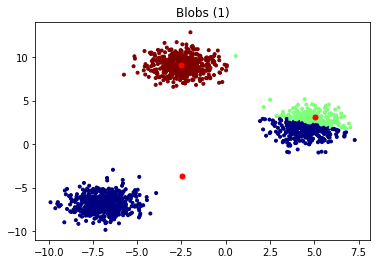

[[-2.4928982702805484, -3.6391855013325816], [5.02557101927562, 3.075379020862397], [-2.5092603902685386, 9.046214854529357]]


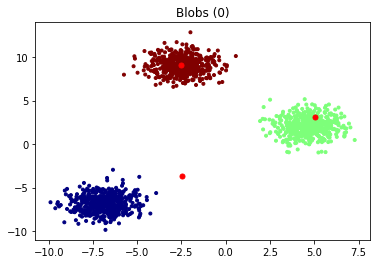

[[-6.886664209466149, -6.858349424915809], [4.6916130817085815, 2.050250331425247], [-2.5031025031171965, 9.048390146899562]]


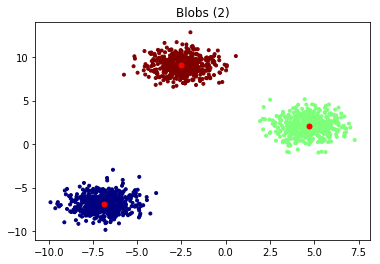

[[-6.886664209466149, -6.858349424915809], [4.6916130817085815, 2.050250331425247], [-2.5031025031171965, 9.048390146899562]]


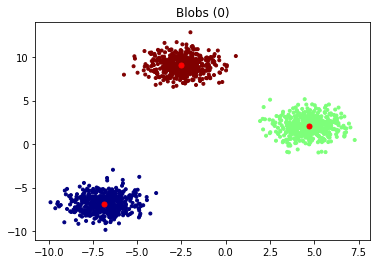

[[-6.886664209466149, -6.858349424915809], [4.6916130817085815, 2.050250331425247], [-2.5031025031171965, 9.048390146899562]]


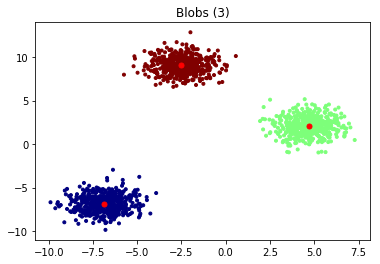

In [20]:
centroids=[[1,1], [3,6], [-2,6]]


no_centroid_change = False
iteration = 0
while no_centroid_change == False:
    iteration = iteration + 1
    membership = y.copy()
    
    for point_idx in range(len(X)):
        point = X[point_idx]
        min_distance = 99999
        for centroid_idx in range(len(centroids)):
            centroid = centroids[centroid_idx]
            if (distance(point, centroid) < min_distance):
                min_distance = distance(point, centroid)
                membership[point_idx] = centroid_idx

    plot_clusters(X, centroids, membership, 0)

    no_centroid_change = True
    for centroid_idx in range(len(centroids)):
        old_centroid = centroids[centroid_idx]
        centroids[centroid_idx] = [np.mean(X[membership == centroid_idx, 0]),
                                   np.mean(X[membership == centroid_idx, 1])]
        if(old_centroid != centroids[centroid_idx]):
            no_centroid_change = False
    plot_clusters(X, centroids, membership, iteration)
